<a href="https://colab.research.google.com/github/Omafuru/My-Portfolio-Projects/blob/master/Top_250_imdb_movie_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import requests, csv
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/chart/top/?ref_=nv_mv_250'

try:
    # Make a GET request to the URL
    response = requests.get(url)
    
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the table containing the top 250 movies
    table = soup.find('tbody', {'class': 'lister-list'})
    
    # Create a CSV file to store the data
    with open('Top_250_movies.csv', mode='w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['Rank', 'Movie Title', 'Rating', 'Director', 'Actors'])
        
        # Loop through each row in the table and extract the data
        for row in table.find_all('tr'):
            rank = row.find('td', {'class': 'titleColumn'}).text.split('.')[0].strip()
            title = row.find('td', {'class': 'titleColumn'}).a.text.strip()
            rating = row.find('td', {'class': 'ratingColumn'}).strong.text.strip()
            director = row.find('td', {'class': 'titleColumn'}).a['title'].split(',')[0].strip().replace(' (dir.)', '')
            actors = ', '.join([actor.strip() for actor in row.find('td', {'class': 'titleColumn'}).a['title'].split(',')[1:]])        
            # Write the data to the CSV file
            writer.writerow([rank, title, rating, director, actors])
            
    print('Data saved to Top_250_movies.csv')
    
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")

Data saved to Top_250_movies.csv


This code portion is used to scrape data from the IMDb website's top 250 movies list and save it to a CSV file. The BeautifulSoup library is used to parse the HTML content of the webpage and extract the relevant information. 

First, the code makes a GET request to the IMDb top 250 movies list webpage. Then, the HTML content is parsed using BeautifulSoup, and the table containing the top 250 movies is identified. 

Next, a CSV file is created with the necessary headers. The code then loops through each row in the table, extracts the movie rank, title, rating, director, and actors, and writes this information to the CSV file. 

To handle any potential errors that may occur during the process, the code is wrapped in a try-except block. If an error occurs, a message is printed indicating that an error has occurred. If no errors occur, a message is printed indicating that the data has been successfully saved to the CSV file.

In [33]:
import pandas as pd
df = pd.read_csv('Top_250_movies.csv')
print(df.head())

   Rank               Movie Title  Rating              Director  \
0     1  The Shawshank Redemption     9.2        Frank Darabont   
1     2             The Godfather     9.2  Francis Ford Coppola   
2     3           The Dark Knight     9.0     Christopher Nolan   
3     4     The Godfather Part II     9.0  Francis Ford Coppola   
4     5              12 Angry Men     9.0          Sidney Lumet   

                         Actors  
0   Tim Robbins, Morgan Freeman  
1      Marlon Brando, Al Pacino  
2  Christian Bale, Heath Ledger  
3     Al Pacino, Robert De Niro  
4      Henry Fonda, Lee J. Cobb  


In [ ]:
print(df.shape)

(250, 5)


The csv table has 250 rows and 5 columns 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         250 non-null    int64  
 1   Movie Title  250 non-null    object 
 2   Rating       250 non-null    float64
 3   Director     250 non-null    object 
 4   Actors       250 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 9.9+ KB


Getting information about the csv all the columns have 250 data count that are not blank and their data types are given too 

In [35]:
df.isnull().sum()

Rank           0
Movie Title    0
Rating         0
Director       0
Actors         0
dtype: int64

Checking for null values

In [ ]:
df.sample(250)

,Rank,Movie Title,Rating,Director,Actors
192,193,The Third Man,8.1,Carol Reed,"Orson Welles, Joseph Cotten"
20,21,Seven Samurai,8.6,Akira Kurosawa,"Toshirô Mifune, Takashi Shimura"
41,42,The Usual Suspects,8.5,Bryan Singer,"Kevin Spacey, Gabriel Byrne"
211,212,Rocky,8.0,John G. Avildsen,"Sylvester Stallone, Talia Shire"
158,159,Gone with the Wind,8.1,Victor Fleming,"Clark Gable, Vivien Leigh"
...,...,...,...,...,...
53,54,Memento,8.4,Christopher Nolan,"Guy Pearce, Carrie-Anne Moss"
182,183,The Grand Budapest Hotel,8.1,Wes Anderson,"Ralph Fiennes, F. Murray Abraham"
226,227,The Incredibles,8.0,Brad Bird,"Craig T. Nelson, Samuel L. Jackson"
232,233,Hachi: A Dog's Tale,8.0,Lasse Hallström,"Richard Gere, Joan Allen"


Showing an unordered sample of the table

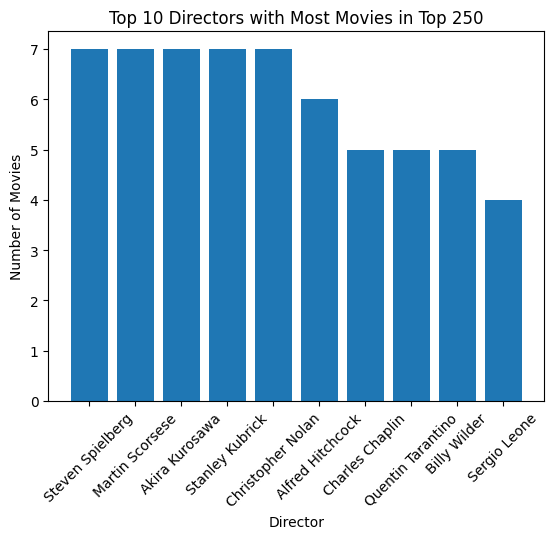

In [36]:
import matplotlib.pyplot as plt

# Read in the CSV file
df = pd.read_csv('Top_250_movies.csv')

# Group the movies by director and count how many movies each director has in the top 250
director_counts = df.groupby('Director')['Rank'].count().sort_values(ascending=False)

# Create a bar chart of the top 10 directors with the most movies in the top 250
plt.bar(director_counts[:10].index, director_counts[:10].values)
plt.xticks(rotation=45)
plt.title('Top 10 Directors with Most Movies in Top 250')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.show()


This graph shows the top 10 Movie Directors with Steven Spieldberg as one of the directors topping the list with over 6 movies

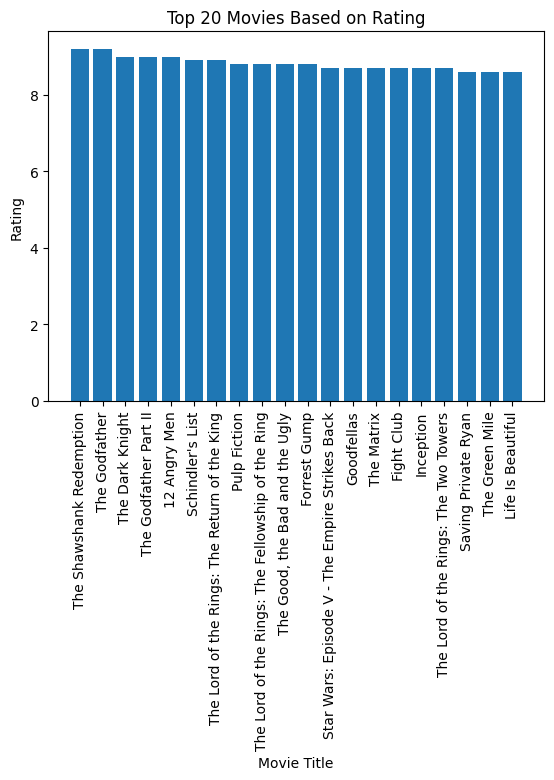

In [37]:
# Sort by rating and select top 20 movies
top20 = df.sort_values(by='Rating', ascending=False).head(20)

# Create a bar plot of the top 20 movies
plt.bar(top20['Movie Title'], top20['Rating'])
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Rating')
plt.title('Top 20 Movies Based on Rating')
plt.show()

This bar chart shows the relationship between movies and their ratings with The Shawshank Redenption and The Godfather having the highest ratings of all time.

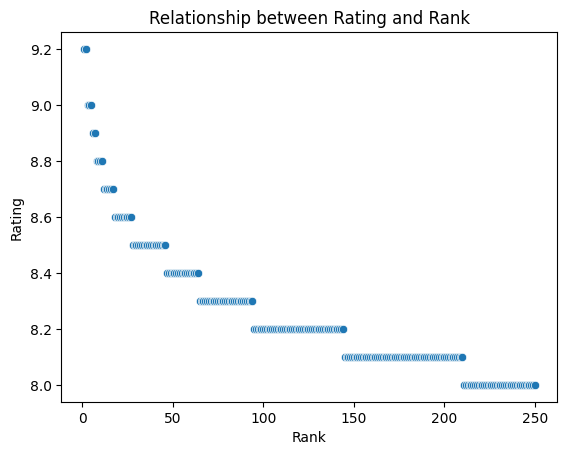

In [38]:
import seaborn as sns
# Create a scatter plot of rating vs rank
sns.scatterplot(data=df, x='Rank', y='Rating')
plt.title('Relationship between Rating and Rank')
plt.show()

This is a scatter plot that shows the relationship between the rank and ratings and we can see that ranks falling between the range of 130 and 210 have ratings of about 8.1 stars.

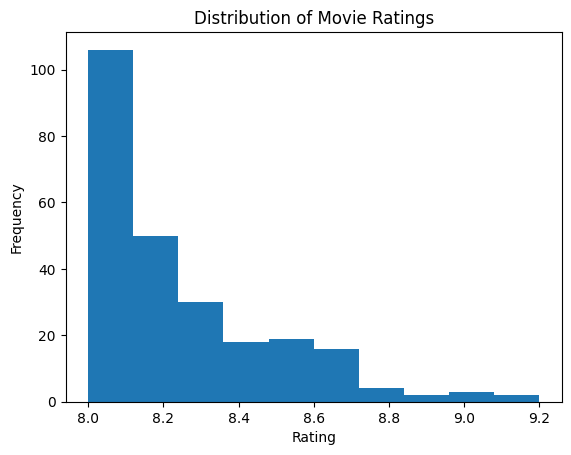

In [39]:
# Create a histogram of movie ratings based on frequency
plt.hist(df['Rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

This graph shows the frequency of movie ratings with most of the movies which over 100 of them rating 8.0

<ipython-input-18-ea1d992816f1>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


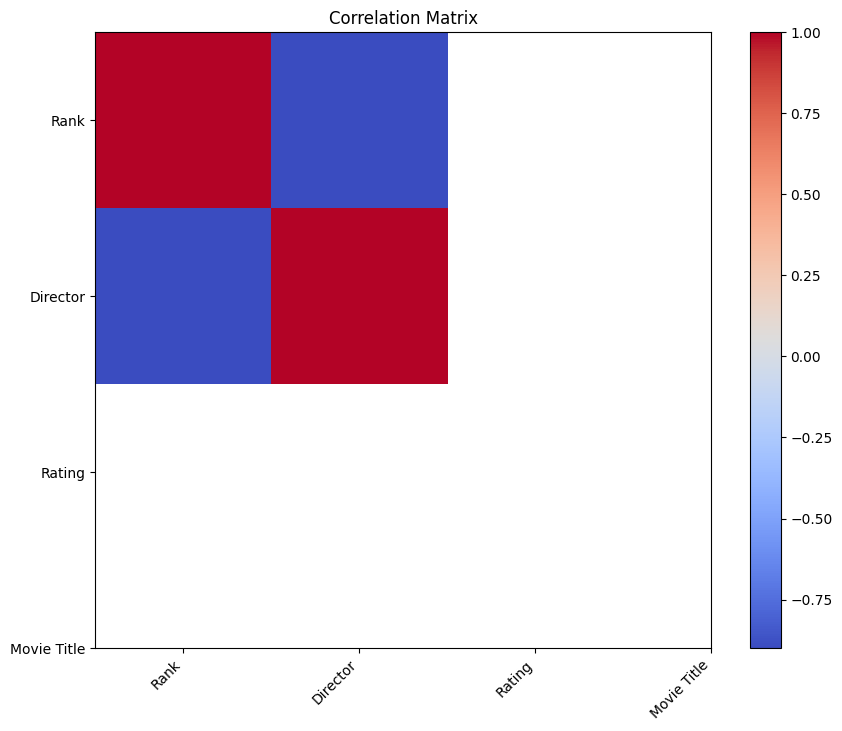

In [18]:
import matplotlib.pyplot as plt

# Select columns to include in correlation matrix
cols = ['Rank', 'Director', 'Rating', 'Movie Title']

# Create a correlation matrix
corr = df[cols].corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr, cmap='coolwarm')

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set axis labels and title
ax.set_xticks(range(len(cols)))
ax.set_yticks(range(len(cols)))
ax.set_xticklabels(cols, rotation=45, ha='right')
ax.set_yticklabels(cols)
ax.set_title('Correlation Matrix')

# Show the plot
plt.show()


The correlation between Rank and Rank is 1. This is not surprising, since the correlation of a variable with itself is always 1. So this simply indicates that there is a perfect positive correlation between the Rank variable and itself. Same for the Director, this makes sense since a movie's Director is always the same person and does not vary within the dataset.

Next, the blank space in the heatmap between Rating and Movie Title indicates that there is no correlation between these two variables. This to me is because  a movie's Rating is based on various factors such as its genre, plot, and acting, and not just its Movie Title.

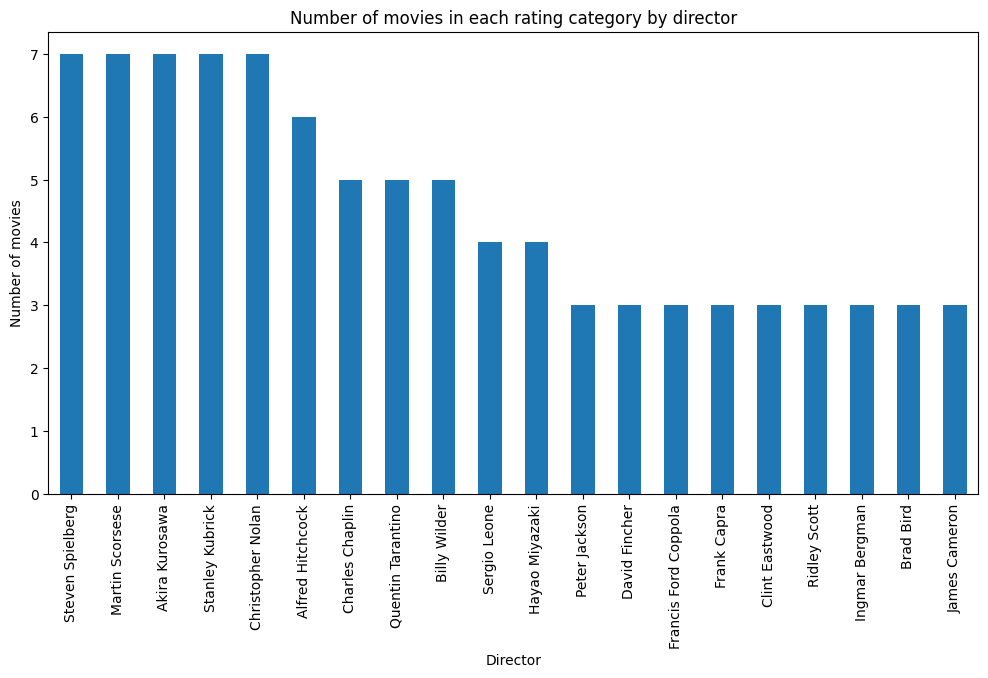

In [19]:
# Pivot data to get number of movies in each rating category by director
director_rating_counts = df.pivot_table(index='Director', columns='Rating', values='Rank', aggfunc='count', fill_value=0)

# Sort directors by total number of movies directed
director_counts = director_rating_counts.sum(axis=1).sort_values(ascending=False)

# Get top 20 directors by total number of movies directed
top_20_directors = director_counts.head(20)

# Plot stacked bar chart
top_20_directors.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Director')
plt.ylabel('Number of movies')
plt.title('Number of movies in each rating category by director')
plt.show()

The bar Chart above shows the number of movies in each rating category by Director wit Stephen Spieldberge as one of the top Directors in a tie with 3 others having the movies in each rating

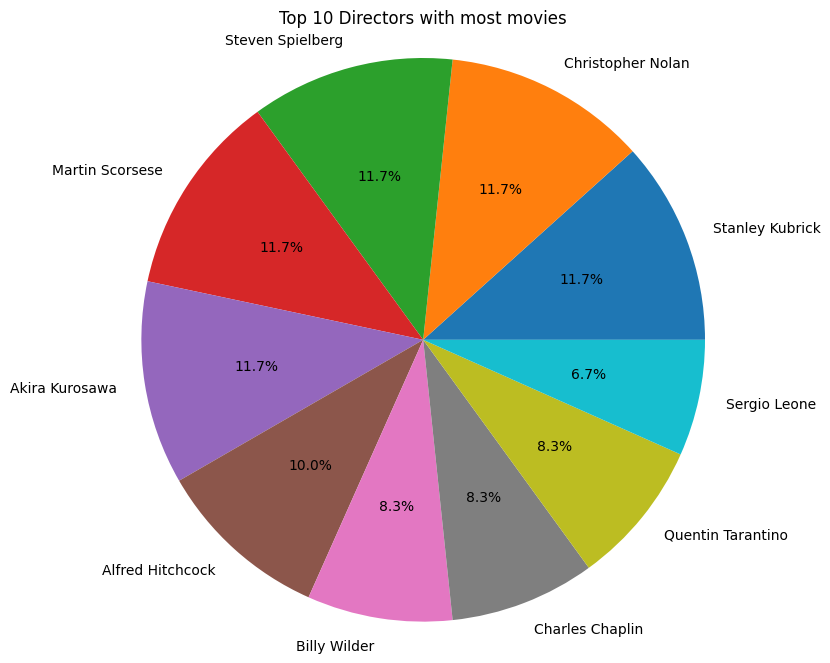

In [22]:
data = pd.read_csv('Top_imdb_250_movies.csv')
director_counts = data['Director'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(director_counts.values, labels=director_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 10 Directors with most movies')
plt.show()

This pie chart shows the top 10 Directors with most movies, Stephen Spieldberge, Akira Kurosawa and Stanley Kubrick are at the top of their game with an 11.7% tie.

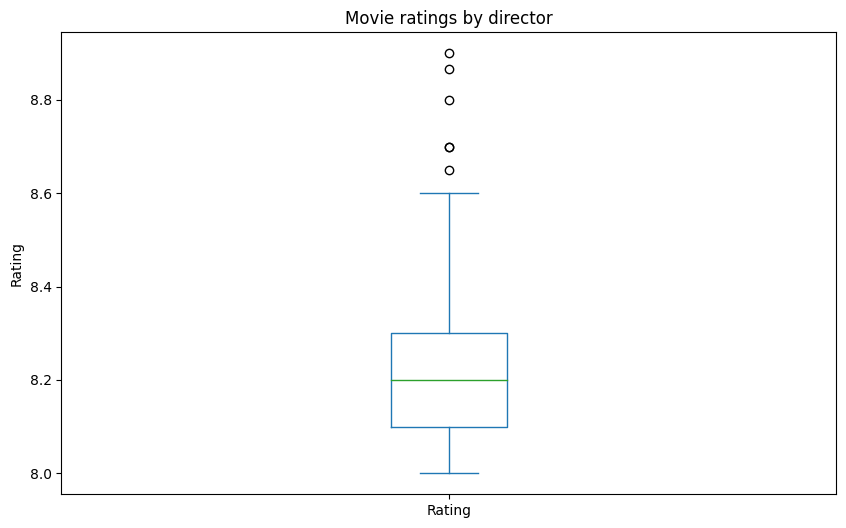

In [ ]:
# Load data from CSV
df = pd.read_csv('Top_imdb_250_movies.csv')

# Pivot data to get movie ratings by director
director_ratings = df.pivot_table(index='Director', values='Rating')

# Plot box plot
director_ratings.plot(kind='box', figsize=(10, 6))
plt.ylabel('Rating')
plt.title('Movie ratings by director')
plt.show()


Most of the ratings by Director are around 8.1 and 8.3 with ratings above 8.6 appearing as outliers here because of the reduced occurence

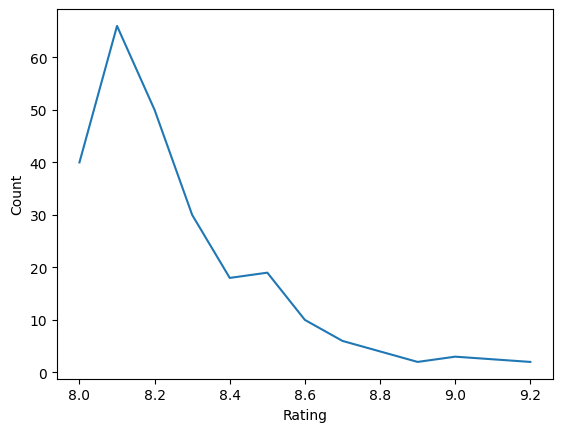

In [ ]:
data = pd.read_csv('Top_imdb_250_movies.csv')
rating_counts = data['Rating'].value_counts().sort_index()
plt.plot(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


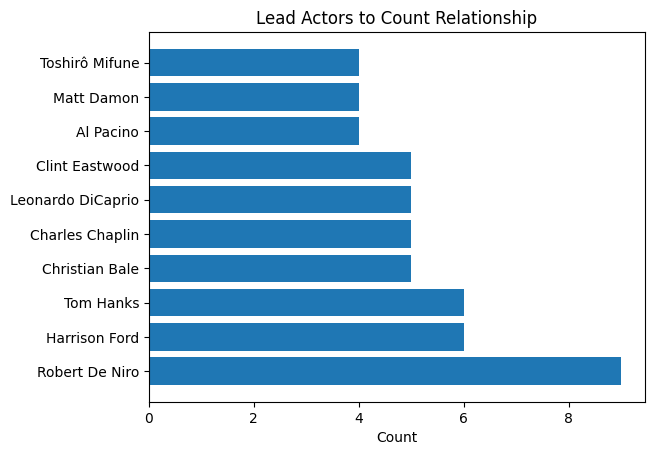

In [25]:
data = pd.read_csv('Top_imdb_250_movies.csv')
actor_counts = pd.Series(data['Actors'].str.split(', ').explode().value_counts().head(10))
plt.barh(actor_counts.index, actor_counts.values)
plt.xlabel('Count')
plt.title('Lead Actors to Count Relationship')
plt.show()


Robert De Niro takes the top spot appearing in over 8 movies in the top 250 movie list. 